In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sns

sns.set(style="whitegrid", palette="deep")

**1. Linear Regression**

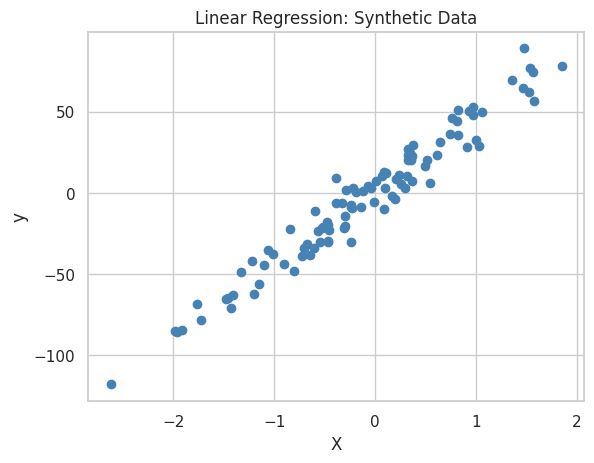

In [ ]:
# === 1.1 Generate Synthetic Data ===
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
plt.scatter(X, y, color='steelblue')
plt.title("Linear Regression: Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


Trained parameters: w=44.437, b=1.165


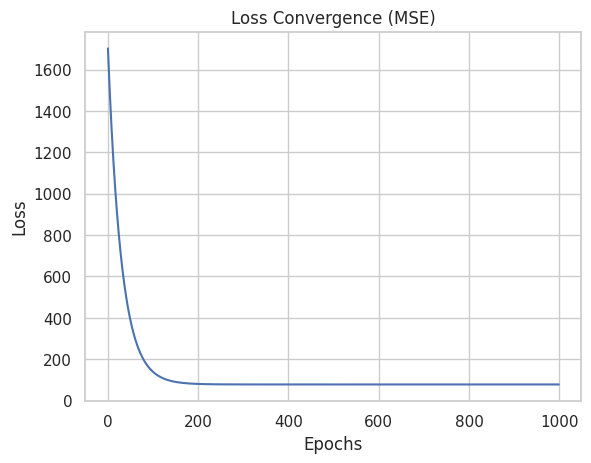

In [ ]:
# === 1.2 Implement Gradient Descent ===
def linear_regression_train(X, y, lr=0.01, epochs=1000):
    m = len(y)
    w, b = 0, 0
    losses = []

    for _ in range(epochs):
        y_pred = w * X + b
        dw = (-2/m) * np.sum(X * (y - y_pred))
        db = (-2/m) * np.sum(y - y_pred)
        w -= lr * dw
        b -= lr * db
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

    return w, b, losses

X_flat = X.flatten()
w, b, losses = linear_regression_train(X_flat, y)
print(f"Trained parameters: w={w:.3f}, b={b:.3f}")

plt.plot(losses)
plt.title("Loss Convergence (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Sklearn Coefficients: [44.43716999] 1.1651153205269726


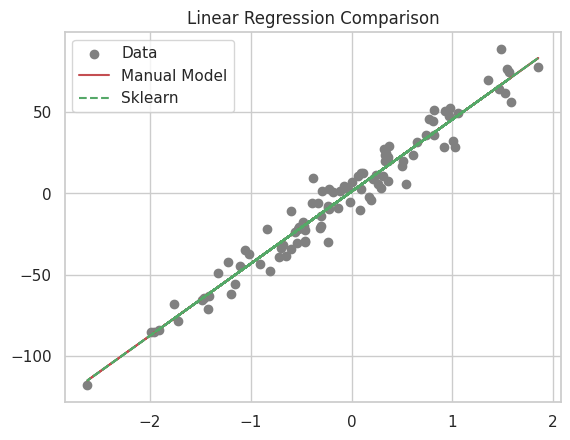

In [ ]:
# === 1.3 Compare with scikit-learn ===
model = LinearRegression().fit(X, y)
print("Sklearn Coefficients:", model.coef_, model.intercept_)

plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, w*X + b, color='r', label='Manual Model')
plt.plot(X, model.predict(X), color='g', linestyle='--', label='Sklearn')
plt.legend()
plt.title("Linear Regression Comparison")
plt.show()


**2. Logistic Regression**

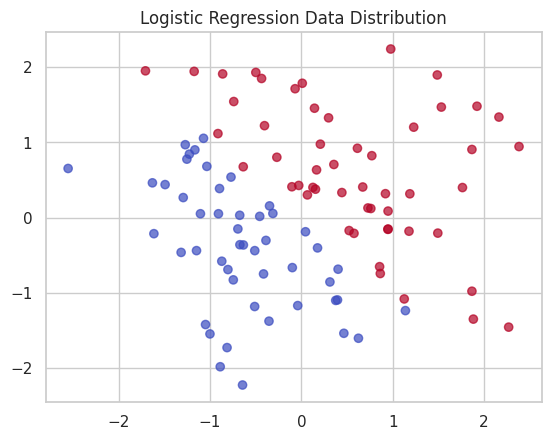

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)

w = np.zeros(X.shape[1])
b = 0
lr = 0.1
epochs = 2000

for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    dw = (1/len(X)) * np.dot(X.T, (y_pred - y))
    db = (1/len(X)) * np.sum(y_pred - y)
    w -= lr * dw
    b -= lr * db

plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("Logistic Regression Data Distribution")
plt.show()


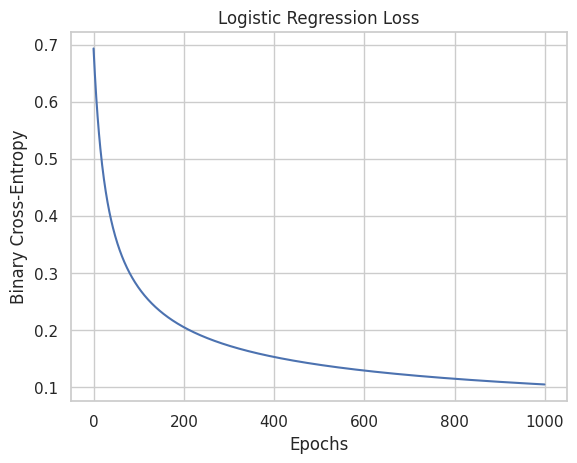

In [ ]:
# === 2.2 Manual Logistic Regression ===
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_train(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for _ in range(epochs):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        loss = -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))
        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.sum(y_hat - y) / m
        w -= lr * dw
        b -= lr * db
        losses.append(loss)

    return w, b, losses

w, b, losses = logistic_train(X, y)
plt.plot(losses)
plt.title("Logistic Regression Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy")
plt.show()


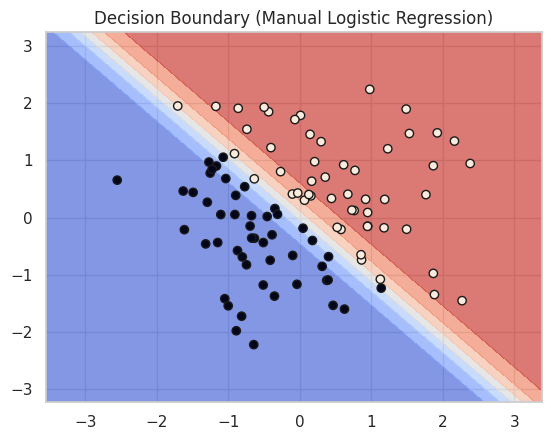

In [ ]:
# === 2.3 Visualize Decision Boundary ===
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = sigmoid(w[0]*xx + w[1]*yy + b)
plt.contourf(xx, yy, Z, alpha=0.7, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("Decision Boundary (Manual Logistic Regression)")
plt.show()


**3. K-Means Clustering**

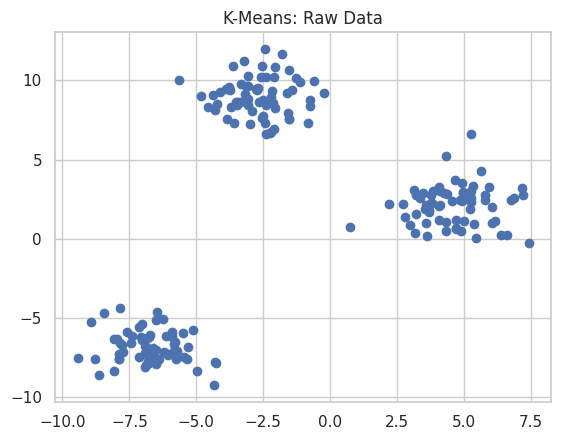

In [ ]:
# === 3.1 Generate Clustering Data ===
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.2, random_state=42)
plt.scatter(X[:,0], X[:,1])
plt.title("K-Means: Raw Data")
plt.show()


Algorithm Intuition :

1. Randomly initialize k centroids.

2. Assign points to nearest centroid.

3. Recompute centroids as cluster means.

4. Repeat until convergence..

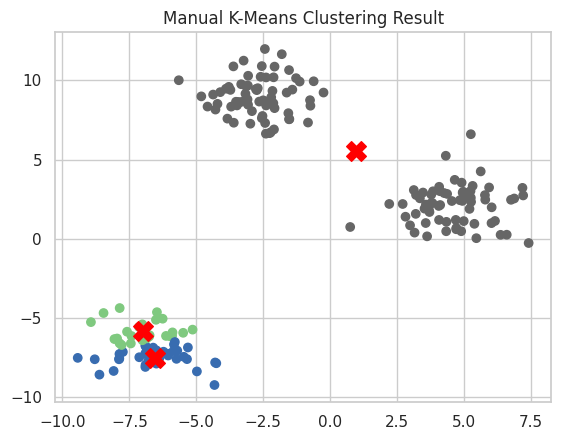

In [ ]:
# === 3.2 Manual K-Means ===
def kmeans(X, k=3, iterations=10):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels, centroids = kmeans(X, k=3)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='Accent')
plt.scatter(centroids[:,0], centroids[:,1], s=200, color='red', marker='X')
plt.title("Manual K-Means Clustering Result")
plt.show()


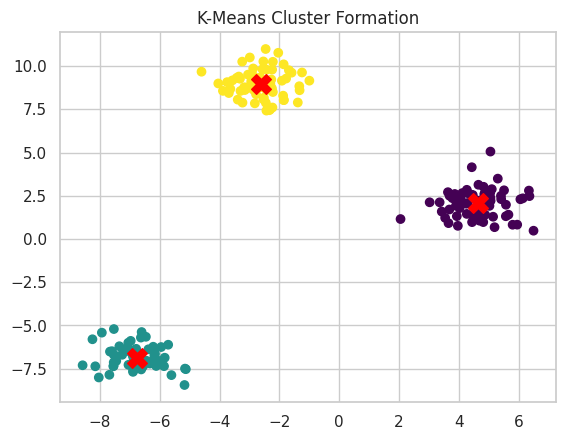

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(42)
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.8)

k = 3
centroids = X[np.random.choice(len(X), k, replace=False)]
for _ in range(10):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    if np.allclose(centroids, new_centroids): break
    centroids = new_centroids

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X')
plt.title("K-Means Cluster Formation")
plt.show()


**4. Summary and Insights**

This notebook demonstrated:

1. Mathematical foundations of Linear, Logistic, and K-Means models.

2. Implementation from scratch, verifying with scikit-learn.

3. Visual understanding of model convergence and decisions.

These algorithms form the core building blocks of advanced models used in real-world AI and data analysis systems.